66.36871508379888


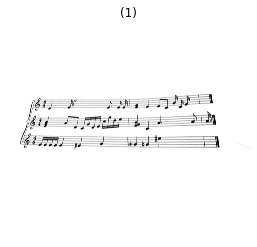

In [97]:
from pre_processing import *
from commonfunctions import *
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.exposure import histogram
import cv2
#img = io.imread("testcases/test-set-camera-captured/test-cases/27.jpg")
img = cv2.imread("testcases/test-set-camera-captured/test-cases/18.jpg")
img = get_gray(img)
img = get_thresholded(img, threshold_otsu(img))
theta = deskew(img)
print(theta)
img = rotation(img,theta)
rotated_img = np.copy(img)
img = get_gray(img)
img = get_thresholded(img, threshold_otsu(img))
show_images([img])

[1370, 1644, 1918, 2193, 2467]
[306, 613, 919, 1226, 1533, 1839, 2146, 2453, 2759, 3066, 3372, 3679, 3986]


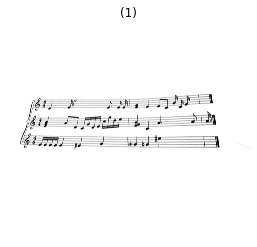

In [98]:
rows = []
cols = []
for x in range(16):
    no = 0
    for col in range(x*img.shape[0]//16,(x+1)*img.shape[0]//16):
        for row in range(img.shape[1]):
            if  img[col][row] == 0:
                no +=1
    if no >= 0.01*img.shape[1]*img.shape[0]//16:
        rows.append(x*img.shape[0]//16)
for x in range(16):
    no = 0
    for row in range(x*img.shape[1]//16,(x+1)*img.shape[1]//16):
        for col in range(img.shape[0]):
            if  img[col][row] == 0:
                no +=1
    if no >= 0.01*img.shape[0]*img.shape[1]//16:
        cols.append(x*img.shape[1]//16)
print(rows)
print(cols)
show_images([img])

In [106]:
point = []
for i in range (rows[0],rows[-1]):
    for j in range(cols[0],cols[-1]):
        if img[i][j] == 0:
            point.append(i)
            break
    if len(point) > 0:
        break
for i in range (cols[0],cols[-1]):
    for j in range(rows[0],rows[-1]):
        if img[j][i] == 0:
            point.append(i)
            break
    if len(point) > 1:
        break
for i in range (rows[-1]+img.shape[0]//16,rows[0],-1):
    for j in range(cols[0],cols[-1]):
        if img[i][j] == 0:
            point.append(i)
            break
    if len(point) > 2:
        break     
for i in range (cols[-1]+img.shape[1]//16,cols[0],-1):
    for j in range(rows[0],rows[-1]):
        if img[j][i] == 0:
            point.append(i)
            break
    if len(point) > 3:
        break 
points = []
points.append((point[0],point[1]))
points.append((point[2],point[3]))

(1104, 3959)


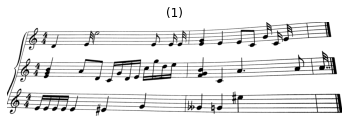

In [107]:
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
#top_left has the smallest sum, bottom_right has the biggest
top_left = [points[0][1],points[0][0]]
#top_left = [cols[0],rows[0]]
#bottom_right = [min(img.shape[1],cols[-1]+img.shape[1]//16),min(img.shape[0],rows[-1]+img.shape[0]//16)]
bottom_right = [points[1][1],points[1][0]]
#top_right = [min(img.shape[1],cols[-1]+img.shape[1]//16),rows[0]]
top_right = [points[1][1],points[0][0]]
#bottom_left = [cols[0],min(img.shape[0],rows[-1]+img.shape[0]//16)]
bottom_left = [points[0][1],points[1][0]]


max_width = int(max(distance(bottom_right, bottom_left), distance(top_right, top_left)))
max_height = int(max(distance(top_right, bottom_right), distance(top_left, bottom_left)))

arr = np.array([
    [0, 0],
    [max_width - 1, 0],
    [max_width - 1, max_height - 1],
    [0, max_height - 1]], dtype="float32")
rectangle = np.asarray([top_left, top_right, bottom_right, bottom_left], dtype="float32")
m = cv2.getPerspectiveTransform(rectangle, arr)
rotated_img = get_gray(rotated_img)
new_img = cv2.warpPerspective(rotated_img, m, (max_width, max_height))
rotated_img = get_gray(rotated_img)
new_img = get_thresholded(new_img, threshold_otsu(new_img))
print(new_img.shape)
show_images([new_img])
